(768,)
[0.49999999999999994, 0.5, 0.49999999999999994, 0.5, 0.49999999999999994, 0.5, 0.49999999999999994, 0.49999999999999994, 0.5, 0.49999999999999994, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5000000000000001, 0.5, 0.49999999999999994, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49999999999999994, 0.5, 0.5, 0.5, 0.49999999999999994, 0.5000000000000001, 0.49999999999999994, 0.49999999999999994, 0.5, 0.5, 0.5, 0.49999999999999994, 0.49999999999999994, 0.5, 0.49999999999999994, 0.49999999999999994, 0.5, 0.49999999999999994, 0.5, 0.5, 0.49999999999999994, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49999999999999994, 0.5, 0.49999999999999994, 0.5, 0.5, 0.5, 0.49999999999999994, 0.49999999999999994, 0.5, 0.5, 0.5, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.5, 0.49999999999999994, 0.5, 0.5, 0.5, 0.49999999999999994, 0.5, 0.5, 0.5, 0.49999999999999994, 0.49999999999999994, 0.499999999

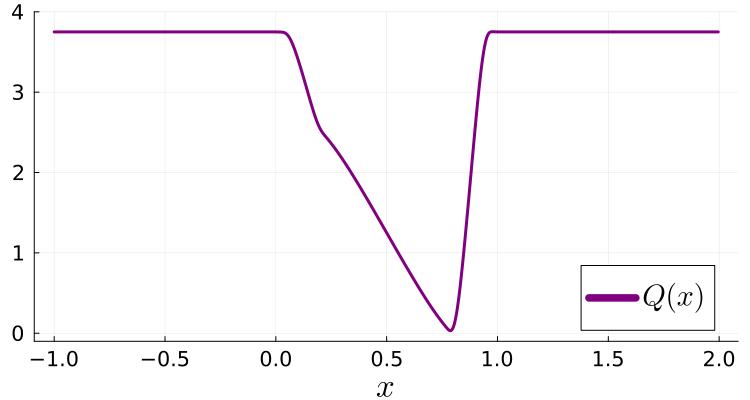

In [ ]:
# Plot functions 
using LinearAlgebra, Plots, LaTeXStrings;

h = 1 / 2^8

α = 1.5
x_l = -1
x_r = 2
Δt = 0.001
t_0 = 0
T = 2
ν = 0.1
num_it_MFG = 50
num_it_HJB = 20
δ = 0.05
R = 30

C_L = 10
C_H = 1 / C_L


x_grid = x_l:h:(x_r-h)
t_vec = t_0:Δt:(T-Δt)
N_h = length(x_grid)
N_T = length(t_vec)
M_T = m_T_func.(x_grid)


M_demo = m_T_func.(x_grid)

C_Q = 1
C_B = 0.5
Q_vec = C_Q * Q(x_grid, δ)
println(size(M_demo))
B_vec, conv_term = C_B .* B(M_demo, x_grid, 2 - 0)
println(B_vec)
println("conv: ")
println(conv_term)
#B_vec = (1/2).*M_demo.^2

p1 = plot(x_grid, Q_vec, label=L"Q(x)", color=:purple, lw=3, xlabel=L"x", bottom_margin=2Plots.mm, size=(750, 400),guidefont = font(22), ylim=(-0.1,4), tickfont = font(14), legendfont = font(20), titlefont=font(20),xticks=-1:0.5:2.0)
plot(p1)
#savefig(p1, joinpath("figures","crowddynamics_Q_runs_74_75.pdf"))


#p2 = plot(B_vec, label=L"B(m)", color=:springgreen3, lw=5,  xlabel=L"m", bottom_margin=1Plots.mm, size=(500, 300),  labelfontsize=13, legendfontsize=13)
#display(p2)
#p2b = plot(x_grid, conv_term, label=L"B(m)", color=:springgreen3, lw=5,  xlabel=L"m", bottom_margin=1Plots.mm, size=(500, 300),  labelfontsize=13, legendfontsize=13)
#display(p2b)
#p2c = plot(x_grid, M_demo)
#display(p2c)

#p3=plot(x_grid, M_T, label=L"M_T", color=:red, lw=2, xlabel=L"x", bottom_margin=1Plots.mm, size=(500, 300), legendfontsize=13, labelfontsize=13)
#plot(p1, p2, p3, layout=3, size=(1000, 300))

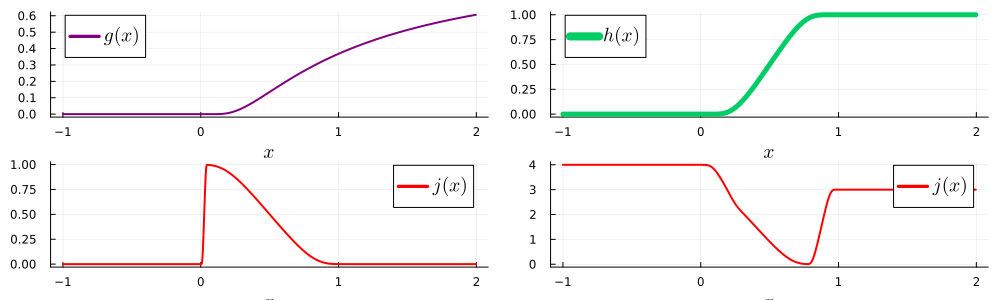

In [ ]:
g = (x) ->  x<0 ? 0 : exp(-1/x)
h = (x) -> g(x)/(g(x)+g(1-x))
j = (x) -> h(20*x)-h(0.1+0.8*x)

p1 = plot(x_grid, g.(x_grid), label=L"g(x)", color=:purple, lw=2, xlabel=L"x", bottom_margin=1Plots.mm, size=(500, 300), legendfontsize=13, labelfontsize=13)
p2 = plot(x_grid, h.(x_grid), label=L"h(x)", color=:springgreen3, lw=5,  xlabel=L"x", bottom_margin=1Plots.mm, size=(500, 300),  labelfontsize=13, legendfontsize=13)
p3=plot(x_grid, j.(x_grid), label=L"j(x)", color=:red, lw=2, xlabel=L"x", bottom_margin=1Plots.mm, size=(500, 300), legendfontsize=13, labelfontsize=13)
p4=plot(x_grid, decreasing_bump_func.(x_grid), label=L"j(x)", color=:red, lw=2, xlabel=L"x", bottom_margin=1Plots.mm, size=(500, 300), legendfontsize=13, labelfontsize=13)
plot(p1, p2, p3, p4, layout=4, size=(1000, 300))

In [ ]:
using DelimitedFiles;
using JSON
using DelimitedFiles;
using Plots, LaTeXStrings;
using Printf

### PLOTTING ###

function read_run_results(run_number)
    U_list = []
    M_list = []
    run="new_crowdcrush_runs/run"*string(run_number)
    params = JSON.parsefile(run*"_params.json")
    Δt = params["Δt"]
    for h in params["h_list"]
        push!(U_list, readdlm(run*"_U_mat_conv_h$(h)_deltat$(Δt).csv", ','))
        push!(M_list, readdlm(run*"_M_mat_conv_h$(h)_deltat$(Δt).csv", ','))
    end
    return params, U_list, M_list
end

function read_run_iterations(run_number, h)
    U_iter_list = []
    M_iter_list = []
    run="new_crowdcrush_runs/run"*string(run_number)
    params = JSON.parsefile(run*"_params.json")
    Δt = params["Δt"]
    #if h ∉ params["h_list"] 
    #    println("h not in h_list")
    #    return
    #end
    # Find all files for this run
    files = readdir("new_crowdcrush_iteration_plots")
    
    iter_numbers = Int[]

    for f in files
        if occursin("run$(run_number)_iter", f) && occursin("M_mat_conv_h$(h)", f)
            m =  match(r"_iter(\d+)", f)
            if m !== nothing
                push!(iter_numbers, parse(Int, m.captures[1]))
            end
        end
    end
    println("iter_numbers: ", iter_numbers)
    iter_folder="new_crowdcrush_iteration_plots/run"*string(run_number)
    final_iter = maximum(iter_numbers)
    for iter in 0:final_iter
        push!(U_iter_list, readdlm(iter_folder*"_iter$(iter)_U_mat_conv_h$(h)_deltat$(Δt).csv", ','))
        push!(M_iter_list, readdlm(iter_folder*"_iter$(iter)_M_mat_conv_h$(h)_deltat$(Δt).csv", ','))
    end
    return params, U_iter_list, M_iter_list, final_iter
end


#PLOT RESULTS

function plot_results(run_number, h_start=1, h_end=-1, save_figures=false)
    params, U_list, M_list = read_run_results(run_number)
    (h_list, α, x_l, x_r, Δt, t_0, T, ν, num_it_MFG, num_it_HJB, δ, R) = (params["h_list"], params["α"], params["x_l"], params["x_r"], params["Δt"], params["t_0"], params["T"], params["ν"], params["num_it_MFG"], params["num_it_HJB"],  params["δ"], params["R"])
    
    if h_end==-1
        h_end=length(h_list)
    end
    println("Plot results for run number: ", run_number) 
    println("!!")
    println("parameters: ", params)
    println("size(U_list): ", size(U_list))
    flush(stdout)
    for (i,h) in enumerate(h_list[h_start:h_end])
        println("----")
        println("i: ", i)
        x_vec = x_l:h:(x_r-h);
        N_h =length(x_vec);
        t_vec = t_0:Δt:(T-Δt)
        N_T =length(t_vec)
        println("x_vec: ", x_vec)
        println("N_h: ", N_h)
        println("t_vec: ", t_vec)
        println("N_T: ", N_T)

        x_reverse_plot = false
        if x_reverse_plot        
            plot_U_mat = transpose(reverse(transpose(U_list[i]), dims=2));
            plot_M_mat = transpose(reverse(transpose(M_list[i]), dims=2));
        else 
            plot_U_mat = (U_list[i]);
            plot_M_mat = (M_list[i]);
        end

        println("SUM: ", sum(plot_M_mat[:,end]*h))
        
        zticks1 = 5:5:20
        p1 = plot(t_vec, x_vec, plot_M_mat, ylabel=L"x", xlabel=L"t",  st=:surface, labelfontsize=15, zlim=(0,50),
        color=cgrad(:cool, rev=false), size=(500, 500), xlim=(0,t_vec[end]), ylim=(0.1,0.9), legend=false, camera=(90- 20, 20), xflip=true, zticks=zticks1, title=L"m(x,t)")
        zticks2 = 0.5:0.5:4
        p2 = plot(t_vec, x_vec, plot_U_mat, xlabel=L"t", ylabel=L"x",   st=:surface, labelfontsize=15,
        color=:cividis, size=(500, 500), xlim=(0,t_vec[end]), zlim=(0, 4), legend=false, camera=(90- 20, 40), xflip=true, zticks=zticks2, title=L"u(x,t)",  ylim=(0, 1))

        # Save plots as PDF with h in the filename
        if save_figures
            run="run"*string(run_number)
            if x_reverse_plot
                savefig(p1, joinpath("figures",run*"_plot_new_M_h$(h)_deltat$(Δt).pdf"))
                savefig(p2, joinpath("figures",run*"_plot_new_U_h$(h)_deltat$(Δt).pdf"))
            else 
                savefig(p1, joinpath("figures",run*"_plot_new_M_h$(h)_deltat$(Δt)_not_rev.pdf"))
                savefig(p2, joinpath("figures",run*"_plot_new_U_h$(h)_deltat$(Δt)_not_rev.pdf"))
            end
        end 
        p = plot(p1, p2, layout=2, size=(600, 300), title="h="*string(h), titlefontsize=10)
        println("Display:") 
        display(p)
        # println("i: ", i)
        # if i==1
        #     break
        # end
        println("!!!!!!!!!")
    end
end


function plot_iterations(run_number, h, save_figures=false)
    params, U_list, M_list, final_iter = read_run_iterations(run_number, h)
    (h_list, α, x_l, x_r, Δt, t_0, T, ν, num_it_MFG, num_it_HJB, δ, R) = (params["h_list"], params["α"], params["x_l"], params["x_r"], params["Δt"], params["t_0"], params["T"], params["ν"], params["num_it_MFG"], params["num_it_HJB"],  params["δ"], params["R"])
    
    println("Plot results for run number: ", run_number) 
    println("Plot iterations from h=",h)
    println("!!")
    println("parameters: ", params)
    sleep(1)
    println("size(U_list): ", size(U_list))
    flush(stdout)

    final_iter = #largest iteration for this run number and this h.
    for i in 0:final_iter
        #println("----")
        #println("i: ", i)
        x_vec = x_l:h:(x_r-h);
        N_h =length(x_vec);
        t_vec = t_0:Δt:(T-Δt)
        N_T =length(t_vec)
        #println("x_vec: ", x_vec)
        #println("N_h: ", N_h)
        #println("t_vec: ", t_vec)
        #println("N_T: ", N_T)

        plot_U_mat = reverse(U_list[i+1], dims=2);
        plot_M_mat = reverse(M_list[i+1], dims=2);

        #println("i: ", i, "SUM: ", sum(plot_M_mat[:,end]*h))
        
        zticks1 = 5:5:20
        p1 = plot(t_vec, x_vec, plot_M_mat, ylabel=L"x", xlabel=L"t",  st=:surface, labelfontsize=15, zlim=(0,50),
        color=cgrad(:cool, rev=false), size=(500, 500), xlim=(0,t_vec[end]), ylim=(0.1,0.9), legend=false, camera=(90- 20, 20), xflip=true, zticks=zticks1, title=L"m(x,t)")
        zticks2 = 0.5:0.5:4
        p2 = plot(t_vec, x_vec, plot_U_mat, xlabel=L"t", ylabel=L"x",   st=:surface, labelfontsize=15,
        color=:cividis, size=(500, 500), xlim=(0,t_vec[end]), zlim=(0, 4), legend=false, camera=(90- 20, 40), xflip=true, zticks=zticks2, title=L"u(x,t)",  ylim=(0, 1))

        # Save plots as PDF with h in the filename
        if save_figures
            savefig(p1, joinpath("figures",run*"_plot_new_M_h$(h)_deltat$(Δt).pdf"))
            savefig(p2, joinpath("figures",run*"_plot_new_U_h$(h)_deltat$(Δt).pdf"))
        end 
        p = plot(p1, p2, layout=2, size=(600, 300), title="iter"*string(i)*"_h="*string(h), titlefontsize=10)
        #println("Display:") 
        display(p)
        # println("i: ", i)
        # if i==1
        #     break
        # end
        #println("!!!!!!!!!")
    end
end



#PLOT RESULTS AT FINAL TIME

function plot_final_time_results(run_number, h_start=1, h_end=-1,  save_figures=false)
    params, U_list, M_list = read_run_results(run_number)
    (h_list, α, x_l, x_r, Δt, t_0, T, ν, num_it_MFG, num_it_HJB, δ, R) = (params["h_list"], params["α"], params["x_l"], params["x_r"], params["Δt"], params["t_0"], params["T"], params["ν"], params["num_it_MFG"], params["num_it_HJB"],  params["δ"], params["R"])
    
    if h_end==-1
        h_end = length(h_list)
    end
    println("FINAL TIME PLOTS")
    println("Plot results for run number: ", run_number) 
    println("!!")
    println("parameters: ", params)
    println("size(U_list): ", size(U_list))
    flush(stdout)
    for (i,h) in enumerate(h_list[h_start: h_end])
        println("----")
        println("i: ", i)
        x_vec = x_l:h:(x_r-h);
        N_h =length(x_vec);
        t_vec = t_0:Δt:(T-Δt)
        N_T =length(t_vec)
        println("x_vec: ", x_vec)
        println("N_h: ", N_h)
        println("t_vec: ", t_vec)
        println("N_T: ", N_T)

        ###################################
        time_index = div(length(t_vec),1)
        println("time_index: ", time_index)

        plot_U_mat_final = U_list[i][:,1];
        plot_M_mat_final = M_list[i][:,time_index];
        plot_U_mat_first = U_list[i][:,time_index];
        plot_M_mat_first = M_list[i][:,1];

        p1 = plot(x_vec, plot_M_mat_final, xlabel=L"x", ylabel=L"y", labelfontsize=10,title="M, h="*string(h)*", t="*string(t_vec[time_index]),
        color=cgrad(:cool, rev=false), size=(500, 500), legend=false) #, xlim=(0,1) )
        #zticks2 = 0.5:0.5:4
        p2 = plot(x_vec, plot_U_mat_final, xlabel=L"x", ylabel=L"y", labelfontsize=10,title="U, h="*string(h)*", t="*string(t_vec[1]),
        color=:cividis, size=(500, 500), legend=false) #,xlim=(0, 1),)

        p3 = plot(x_vec, plot_M_mat_first, xlabel=L"x", ylabel=L"y", labelfontsize=10,title="M, h="*string(h)*", t="*string(t_vec[1]),
        color=cgrad(:cool, rev=false), size=(500, 500), legend=false) #, xlim=(0,1) )
        #zticks2 = 0.5:0.5:4
        
        p4 = plot(x_vec, plot_U_mat_first, xlabel=L"x", ylabel=L"y", labelfontsize=10,title="U, h="*string(h)*", t="*string(t_vec[time_index]),
        color=:cividis, size=(500, 500), legend=false) #,xlim=(0, 1),)

        if save_figures
            savefig(p1, joinpath("figures",run*"_final_time_plot_final_M_h$(h)_deltat$(Δt).pdf"))
            savefig(p2, joinpath("figures",run*"_final_time_plot_final_U_h$(h)_deltat$(Δt).pdf"))
            savefig(p3, joinpath("figures",run*"_final_time_plot_first_M_h$(h)_deltat$(Δt).pdf"))
            savefig(p4, joinpath("figures",run*"_final_time_plot_first_U_h$(h)_deltat$(Δt).pdf"))
        end
        p = plot(p1, p2, p3, p4, layout=4, size=(600, 600), titlefontsize=10)
        println("Display:")
        display(p)
        # println("i: ", i)
        # if i==1
        #     break
        # end
        println("!!!!!!!!!")
    end
end

#PLOT RESULTS AT FINAL TIME

function plot_final_time_iterations(run_number, h)
       params, U_list, M_list, final_iter = read_run_iterations(run_number, h)
    (h_list, α, x_l, x_r, Δt, t_0, T, ν, num_it_MFG, num_it_HJB, δ, R) = (params["h_list"], params["α"], params["x_l"], params["x_r"], params["Δt"], params["t_0"], params["T"], params["ν"], params["num_it_MFG"], params["num_it_HJB"],  params["δ"], params["R"])
    
    println("Plot results for run number: ", run_number) 
    println("Plot iterations from h=",h)
    println("!!")
    println("parameters: ", params)
    println("size(U_list): ", size(U_list))
    flush(stdout)
    final_iter = #largest iteration for this run number and this h.
    for i in 0:final_iter
        #println("----")
        #println("i: ", i)
        x_vec = x_l:h:(x_r-h);
        N_h =length(x_vec);
        t_vec = t_0:Δt:(T-Δt)
        N_T =length(t_vec)
        #println("x_vec: ", x_vec)
        #println("N_h: ", N_h)
        #println("t_vec: ", t_vec)
        #println("N_T: ", N_T)

        plot_U_mat = reverse(U_list[i+1], dims=2);
        plot_M_mat = reverse(M_list[i+1], dims=2);

        ###################################
        time_index = div(length(t_vec),1)
        println("time_index: ", time_index)

        plot_U_mat_first = U_list[i+1][:,1];
        plot_M_mat_final = M_list[i+1][:,time_index];
        plot_U_mat_final = U_list[i+1][:,time_index];
        plot_M_mat_first = M_list[i+1][:,1];

        p1 = plot(x_vec, plot_M_mat_final, xlabel=L"x", ylabel=L"y", labelfontsize=10,title="M, h="*string(h)*", t="*string(t_vec[time_index]),
        color=cgrad(:cool, rev=false), size=(500, 500), legend=false) #, xlim=(0,1) )
        #zticks2 = 0.5:0.5:4
        p2 = plot(x_vec, plot_U_mat_final, xlabel=L"x", ylabel=L"y", labelfontsize=10,title="U, h="*string(h)*", t="*string(t_vec[1]),
        color=:cividis, size=(500, 500), legend=false) #,xlim=(0, 1),)

        p3 = plot(x_vec, plot_M_mat_first, xlabel=L"x", ylabel=L"y", labelfontsize=10,title="M, h="*string(h)*", t="*string(t_vec[1]),
        color=cgrad(:cool, rev=false), size=(500, 500), legend=false) #, xlim=(0,1) )
        #zticks2 = 0.5:0.5:4
        
        p4 = plot(x_vec, plot_U_mat_first, xlabel=L"x", ylabel=L"y", labelfontsize=10,title="U, h="*string(h)*", t="*string(t_vec[time_index]),
        color=:cividis, size=(500, 500), legend=false) #,xlim=(0, 1),)

        p = plot(p1, p2, p3, p4, layout=4, size=(600, 600), title="iter"*string(i)*"_h="*string(h), titlefontsize=10)
        println("Display:")
        display(p)
        # println("i: ", i)
        # if i==1
        #     break
        # end
        println("!!!!!!!!!")
    end
end

plot_final_time_iterations (generic function with 1 method)

In [ ]:
using DelimitedFiles;
using JSON
using DelimitedFiles;
using Plots, LaTeXStrings;
using Printf

#PLOT COLORMAP

function read_run_iterations(run_number, h)
    U_iter_list = []
    M_iter_list = []
    run="new_crowdcrush_runs/run"*string(run_number)
    params = JSON.parsefile(run*"_params.json")
    Δt = params["Δt"]

    files = readdir("new_crowdcrush_iteration_plots")
    
    iter_numbers = Int[]

    for f in files
        if occursin("run$(run_number)_iter", f) && occursin("M_mat_conv_h$(h)", f)
            m =  match(r"_iter(\d+)", f)
            if m !== nothing
                push!(iter_numbers, parse(Int, m.captures[1]))
            end
        end
    end
    println("iter_numbers: ", iter_numbers)
    iter_folder="new_crowdcrush_iteration_plots/run"*string(run_number)
    final_iter = maximum(iter_numbers)
    for iter in 0:final_iter
        push!(U_iter_list, readdlm(iter_folder*"_iter$(iter)_U_mat_conv_h$(h)_deltat$(Δt).csv", ','))
        push!(M_iter_list, readdlm(iter_folder*"_iter$(iter)_M_mat_conv_h$(h)_deltat$(Δt).csv", ','))
    end
    return params, U_iter_list, M_iter_list, final_iter
end

function plot_colormap(run_number, h, save_figures=false)
    params, U_list, M_list, final_iter = read_run_iterations(run_number, h)
    (h_list, α, x_l, x_r, Δt, t_0, T, ν, num_it_MFG, num_it_HJB, δ, R) = (params["h_list"], params["α"], params["x_l"], params["x_r"], params["Δt"], params["t_0"], params["T"], params["ν"], params["num_it_MFG"], params["num_it_HJB"],  params["δ"], params["R"])
    
    println("Plot results for run number: ", run_number) 
    println("Plot iterations from h=",h)
    println("!!")
    println("parameters: ", params)
    sleep(1)
    println("size(U_list): ", size(U_list))
    flush(stdout)

    i =final_iter
      #println("----")
   #println("i: ", i)
   x_vec = x_l:h:(x_r-h);
   N_h =length(x_vec);
   t_vec = t_0:Δt:(T-Δt)
   N_T =length(t_vec)
   #println("x_vec: ", x_vec)
   #println("N_h: ", N_h)
   #println("t_vec: ", t_vec)
   #println("N_T: ", N_T)

   plot_U_mat = U_list[i+1]
   plot_M_mat = M_list[i+1]
   println("size(plot_M_mat): ",size(plot_M_mat))

   x_vec_trimmed = x_vec[0.0 .<= x_vec .< 1]
   println("size(x_vec_trimmed): ",size(x_vec_trimmed))

   plot_M_mat_trimmed = plot_M_mat[0.0 .<= x_vec .< 1,:]
   plot_U_mat_trimmed = plot_U_mat[0.0 .<= x_vec .< 1,:]
   println("size(plot_M_mat_trimmed): ",size(plot_M_mat_trimmed))
   #println("i: ", i, "SUM: ", sum(plot_M_mat[:,end]*h))
   #p = heatmap(x_vec, t_vec, transpose(plot_U_mat), color = :thermal, colorbar = true, clims=(minimum(plot_U_mat), maximum(plot_U_mat)))
   #clims=(minimum(plot_M_mat_trimmed), maximum(plot_M_mat_trimmed))
   println("maximum(plot_M_mat_trimmed): ", maximum(plot_M_mat_trimmed))
   println("maximum(plot_U_mat_trimmed): ", maximum(plot_U_mat_trimmed))
   u_max = 5.5 #5.782820414745114 #3.7211157106262425 #3.1423765704210505+0.05
   max_m= 5.99 #maximum(plot_M_mat_trimmed)
   cmap =  cgrad([RGB(0.0, 0.0, 0.3), :blue, :white, :red, RGB(0.5, 0.0, 0.0)], [0, 0.25, 0.5, 0.75, 1], scale=:linear) # cgrad([RGB(0.0, 0.0, 0.3), :white, RGB(0.5, 0.0, 0.0)], [0, 0.1, 1], scale=:linear)
   p1 = heatmap(x_vec_trimmed, t_vec, transpose(plot_M_mat_trimmed), color = cmap, colorbar = true, clims=(0, max_m), xlabel=L"x", ylabel=L"t", title=L"m(x,t)", 
   guidefont = font(20), tickfont = font(12), legendfont = font(12), titlefont=font(20),xticks=0:0.1:1.0, legend=false)
   p2 = heatmap(x_vec_trimmed, t_vec, transpose(plot_U_mat_trimmed), color = :seismic, colorbar = true, clims=(0, u_max), xlabel=L"x", ylabel=L"t", title=L"u(x,t)", 
   guidefont = font(20), tickfont = font(12), legendfont = font(12), titlefont=font(20),xticks=0:0.1:1.0)
   display(p1)
   display(p2)
   #p1 = plot(x_vec,t_vec, transpose(plot_U_mat), ylabel=L"t", xlabel=L"x",  st=:heatmap, labelfontsize=15, color=:cividis, size=(500, 500), ylim=(0,t_vec[end]), xlim=(0.1,0.9), legend=false, title=L"u(x,t)")
   
   #p2 = plot(t_vec, x_vec, transpose(plot_M_mat), xlabel=L"x", ylabel=L"t",   st=:heatmap, labelfontsize=15, cgrad(:cool, rev=true), size=(500, 500), ylim=(0,t_vec[end]), xlim=(0.1,0.9), legend=false, title=L"m(x,t)")

   # Save plots as PDF with h in the filename
   
   if save_figures
      savefig(p1, joinpath("figures","run"*string(run_number)*"_plot_crowddynamics_M_h$(h)_deltat$(Δt)_physical_time.pdf"))
      savefig(p2, joinpath("figures","run"*string(run_number)*"_plot_crowddynamics_U_h$(h)_deltat$(Δt)_physical_time.pdf"))
   end 
   #p = plot(p1, layout=1, size=(600, 300), title="iter"*string(i)*"_h="*string(h), titlefontsize=10)
   #println("Display:") 
   #display(p)
   # println("i: ", i)
   # if i==1
   #     break
   # end
   #println("!!!!!!!!!")
end

plot_colormap (generic function with 2 methods)